In [9]:

from pytesis.intervals import *
from pytesis.power import *
from pytesis.utils import kde_grid
from pytesis.datasets import (
    arc,
    eyeglasses,
    filled_circle,
    add_noise,
    add_outliers,
    football_sensor,
    rectangle
)
from pytesis.datasets import plot_dataset
from pytesis.fermat import fermat_dist
from sklearn.metrics import pairwise_distances
from functools import partial
import numpy as np
import pandas as pd

from functools import partial

import matplotlib.pyplot as plt

In [48]:
def run_all_intervals(X, h=0.3, B=300):
    print("Starting run...")
    result_euclid = hausd_interval(X, B=B)
    print("Finished running euclidean")
    result_kde = bootstrap_function_interval(X, B=B, value_function=partial(kde_grid, h=h), grid_n=100)
    print("Finished running KDE")
    fermat_matrix = fermat_dist(X, alpha=2)
    print("Computed fermat distance matrix")
    result_fermat = hausd_interval(fermat_matrix, B=B, pairwise_dist=True)
    print("Finished running Fermat")

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    plot_dataset(X, ax=axs[0, 0])
    plot_result(result_euclid, ax=axs[0, 1], title="Euclideo")
    plot_result(result_fermat, ax=axs[1, 0], title="Fermat")
    plot_result(result_kde, ax=axs[1, 1], title="Densidad")
    fig.show()
    return result_euclid, result_kde, result_fermat


def run_all_powers(dataset_factory, h=0.3, B_power=30, B_interval=300):
    print("Starting computing intervals")
    X = dataset_factory()
    result_euclid, result_kde, result_fermat = run_all_intervals(X, h=h, B=B_interval)

    print("Starting power analysis")
    power_euclid = distance_power(
        dataset_factory, band=result_euclid.band, dist_function=None, B=B_power, ncores=3
    )
    print("Finished euclid power analysis")
    power_fermat = distance_power(
        dataset_factory, band=result_fermat.band, dist_function=fermat_dist, B=B_power, ncores=3
    )
    print("Finished fermat power analysis")
    dimensions, positions = make_grid(X_circle, grid_n=100)
    power_kde = function_power(
        dataset_factory,
        band=result_kde.band,
        value_function=partial(kde_grid, h=h),
        positions=positions,
        dimensions=dimensions,
        B=B_power,
        ncores=3,
    )
    print("Finished kde power analysis")
    
    power_results = pd.concat(
        [
            power_euclid.table,
            power_fermat.table,
            power_kde.table
        ],
        keys=["Euclidean", "Fermat", "Density"]
    )
    power_results.index = power_results.index.get_level_values(0)
    return power_results

# Circulo

In [49]:
n = 500
sd = 0.1
iqr_factor = 0.2
outliers_frac = 0.05

## Base

Starting computing intervals
Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat
Starting power analysis


/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

Finished euclid power analysis
Finished fermat power analysis
Finished kde power analysis


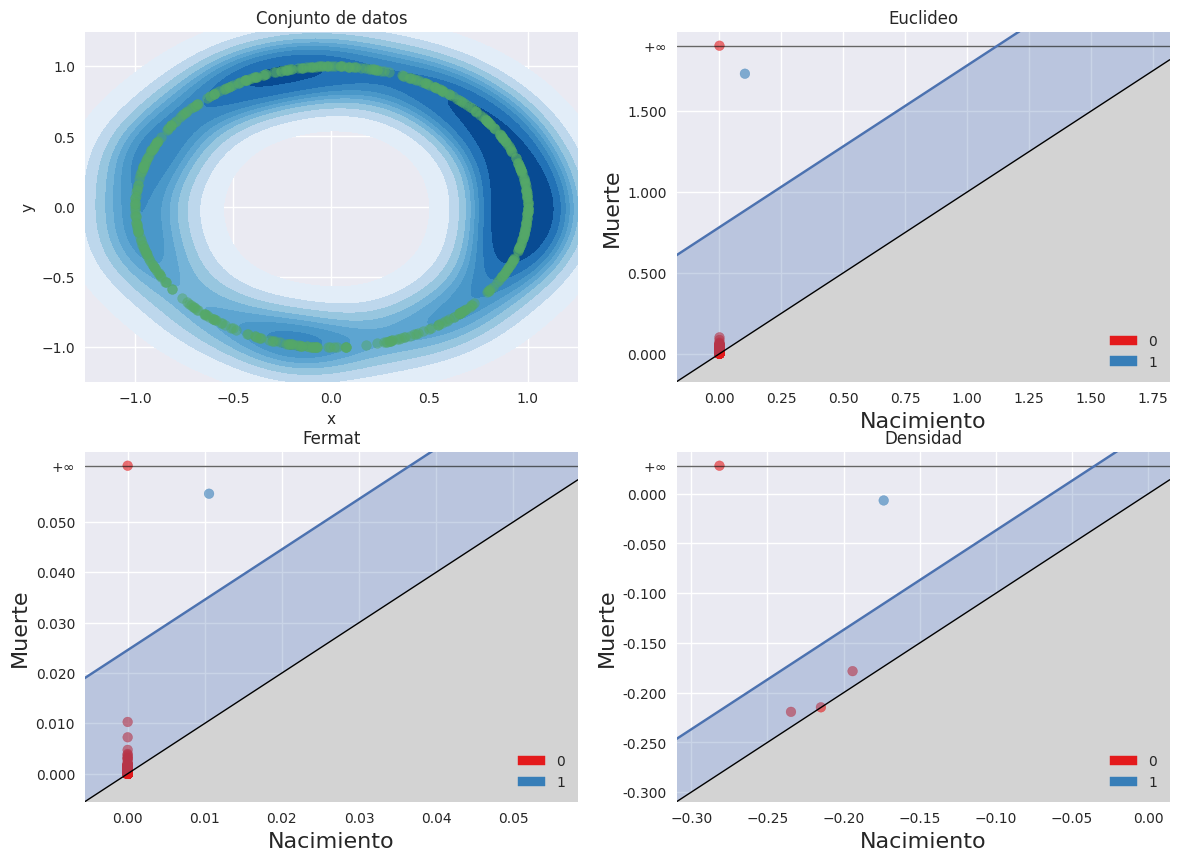

In [50]:
B = 30
circle_factory = partial(arc, n=n)
circle_results = run_all_powers(circle_factory, h=0.3, B_power=B)

In [51]:
circle_results

,holes,counts,percentage
Euclidean,1,30,1.0
Fermat,1,30,1.0
Density,1,30,1.0


Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat


/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

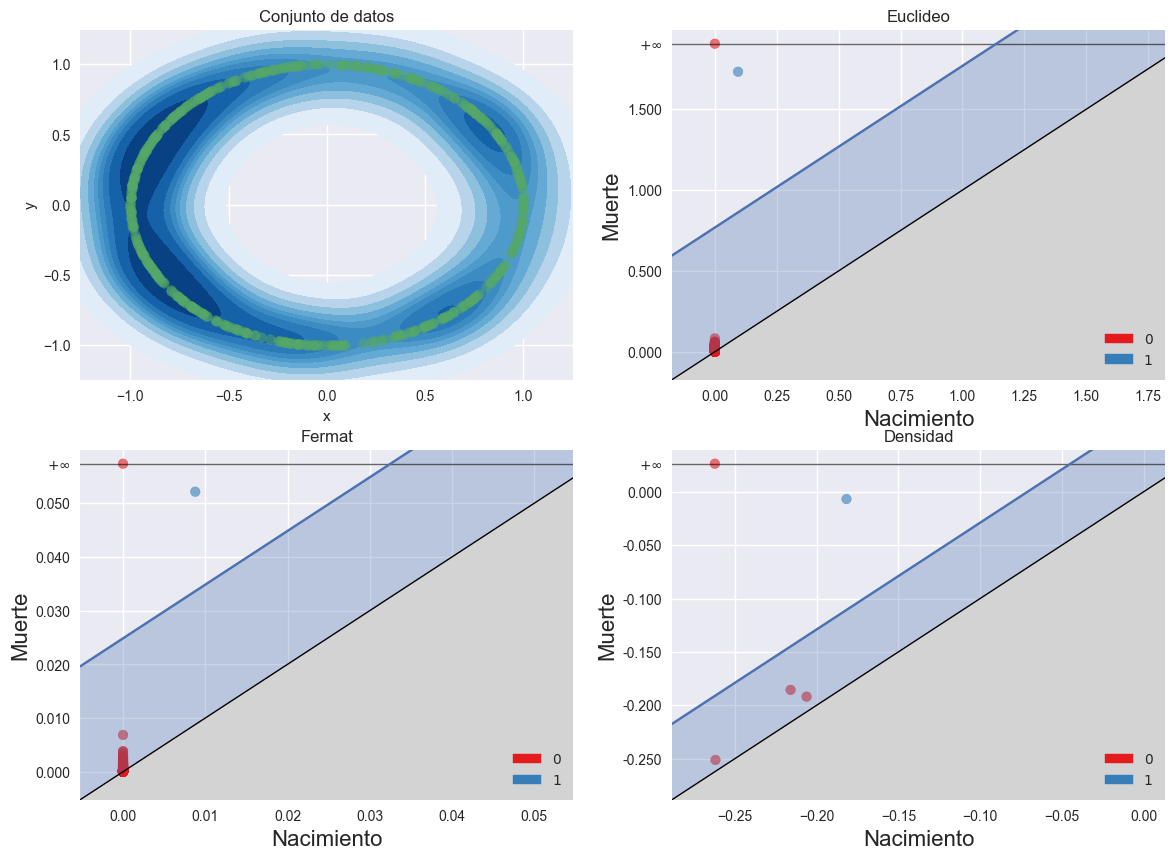

In [12]:
X_circle = arc(n=n)
interval_results_circle_base = run_all_intervals(X_circle)

In [20]:
B = 30
circle_factory = partial(arc, n=n)
power_circle_euclidean = distance_power(
    circle_factory,
    band=interval_results_circle_base[0].band,
    dist_function=None,
    B=B,
    ncores=3
)

In [22]:
power_circle_euclidean.table

,holes,counts,percentage
0,1,30,1.0


In [16]:
power_circle_fermat = distance_power(
    circle_factoy,
    band=interval_results_circle_base[2].band,
    dist_function=fermat_dist,
    B=B,
    ncores=3
)

In [ ]:
power_circle_fermat.table

In [23]:
h = 0.3
dimensions, positions = make_grid(X_circle, grid_n=100)
power_circle_kde = function_power(
    circle_factory,
    band=interval_results_circle_base[1].band,
    value_function=partial(kde_grid, h=h),
    positions=positions,
    dimensions=dimensions,
    B=B,
    ncores=3,
)


In [24]:
power_circle_kde.table

,holes,counts,percentage
0,1,30,1.0


In [36]:
power_circle_results = pd.concat(
    [
        power_circle_euclidean.table,
        power_circle_fermat.table,
        power_circle_kde.table
    ],
    keys=["Euclideo", "Fermat", "Densidad"]
)
power_circle_results.index = power_circle_results.index.get_level_values(0)

In [37]:
power_circle_results

,holes,counts,percentage
Euclideo,1,30,1.0
Fermat,1,30,1.0
Densidad,1,30,1.0


In [4]:
result.table

,holes,counts,percentage
0,2,10,1.0
